In [15]:
import pandas as pd
path = '../data/11.#900吸附劑壽命_明志科大poc/R911R912 _明志蔡教授_R3-ARO2.xlsx'
df清單 = pd.read_excel(path,sheet_name='R911R912_TAG清單')
dfx = pd.read_excel(path,sheet_name='R911R912_TAG相關錶點資料(X)')
dfy = pd.read_excel(path,sheet_name='目標值(Y)相關錶點資料')
df = pd.concat([dfx,dfy],axis=1)
display(df清單)
display(df.head())

,Name,Description,engunits,Unnamed: 3
0,ARO2-DCS-FI91304,RV2 rotary valve outlet seal oil flow rate,M3/H,RV2旋轉閥密出口密封油流量
1,ARO2-DCS-FI91401,R912 adsorbent chamber no.2 outlet pumparount ...,M3/H,R912二號吸附室pumparound(泵送循環)到一號吸附室流量(流孔板流量計)
2,ARO2-DCS-FI914A2,R912 adsorbent chamber no.2 outlet pumparount ...,FM3/H,R912二號吸附室pumparound(泵送循環)到一號吸附室流量(渦輪式流量計)
3,ARO2-DCS-FI914A3,R911 adsorbent chamber no.1 outlet pusharount ...,FM3/H,R911一號吸附室pusharound(推送循環)到二號吸附室流量
4,ARO2-DCS-FI914B2,R912 adsorbent chamber no.2 outlet pumparount ...,FM3/H,R912二號吸附室pumparound(泵送循環)到一號吸附室流量
...,...,...,...,...
83,ARO2-LIMS-s919@A10+,Recycle Desorbent A10+,wt.ppm,脫附劑A10+含量
84,ARO2-LIMS-s919@Br.Index,Recycle Desorbent Bromine Index,mg/100g,脫附劑溴指數
85,新增補充錶點,NaN,NaN,NaN
86,ARO2-LIMS-S905@Water,Raffinate Water from Rotary Valve NO.1,wt.ppm,旋轉閥(RV)萃餘油水份含量


,Unnamed: 0,Unnamed: 1,Unnamed: 2,ARO2-DCS-FI91304,ARO2-DCS-FI91401,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91501,...,新增補充錶點,Unnamed: 1,ARO2-LIMS-S708@PX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-LIMS-s922@EB,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-s922@OX,ARO2-DCS-PX@Recovery
0,NaN,NaN,2017-01-01 00:00:00,3.47454,1497.95,1494.6,1784.32,1487.99,1770.95,25.9889,...,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2017-01-01 01:00:00,3.5263,1495.14,1562.32,1782.8,1483.48,1774.38,23.069,...,NaN,2017-01-01 01:00:00,23.077,34.433998,0.409,768.0,99.699997,1330.0,521.0,96.28
2,NaN,NaN,2017-01-01 02:00:00,3.50952,2083.71,2066.14,1804.13,2071.64,1793.95,22.9811,...,NaN,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2017-01-01 03:00:00,3.41844,2058.17,2054.37,1769.39,2058.04,1770.95,23.0346,...,NaN,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2017-01-01 04:00:00,3.49544,2062.55,2064.68,1792.09,2066.45,1770.95,22.9907,...,NaN,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


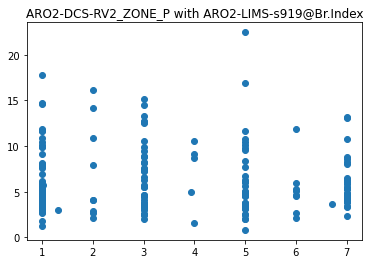

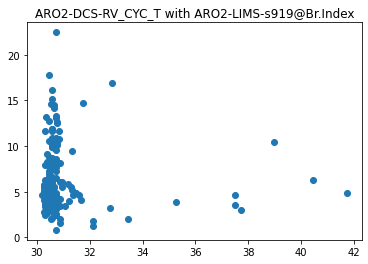

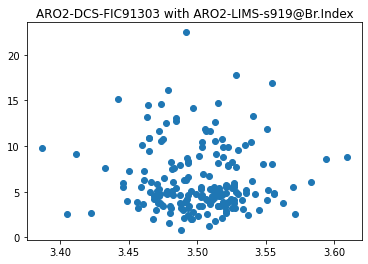

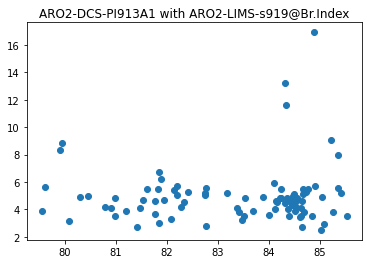

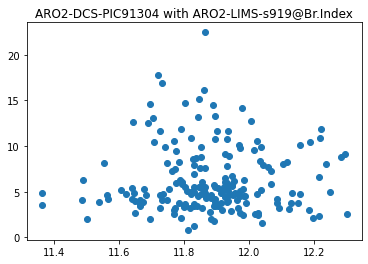

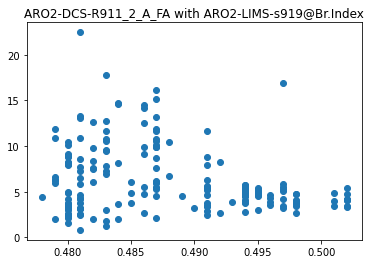

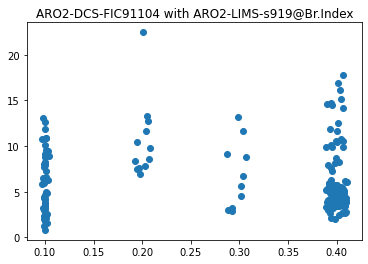

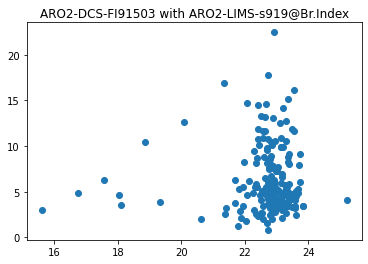

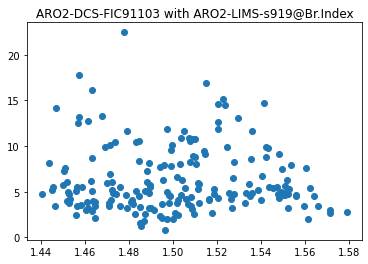

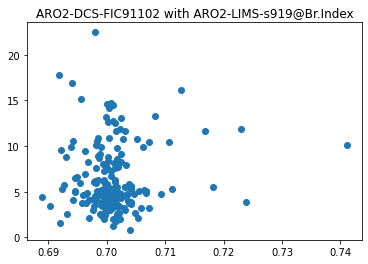

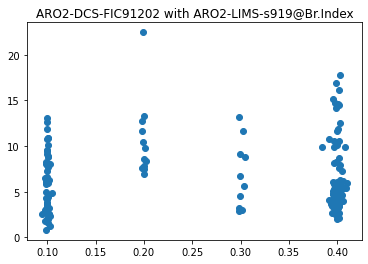

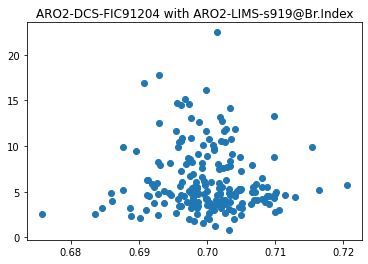

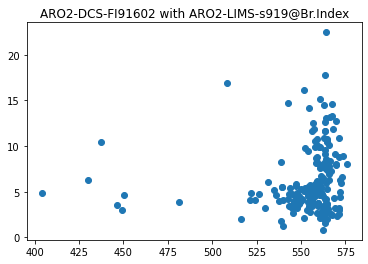

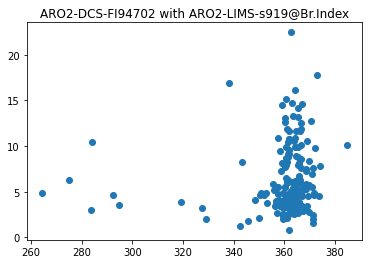

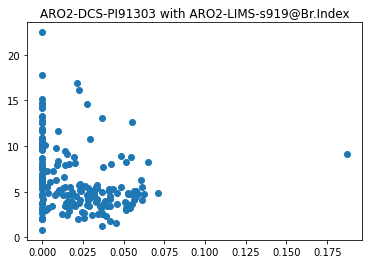

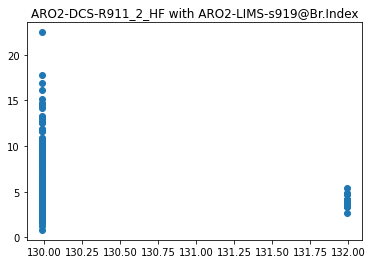

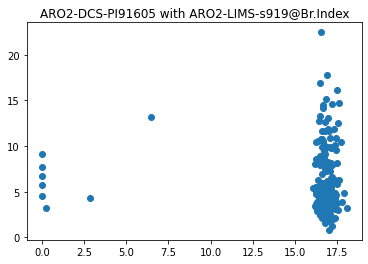

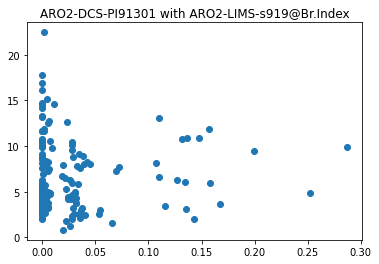

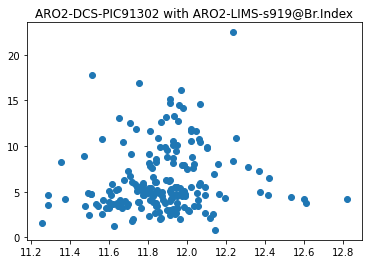

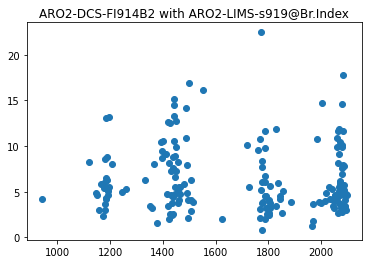

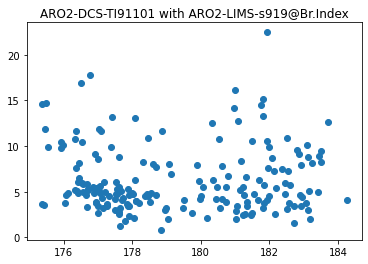

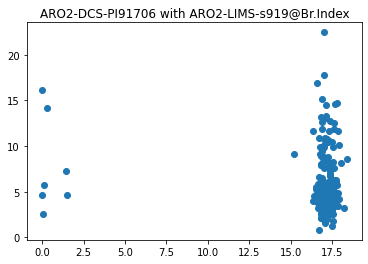

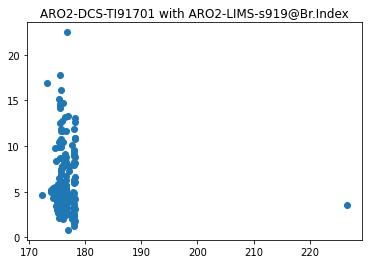

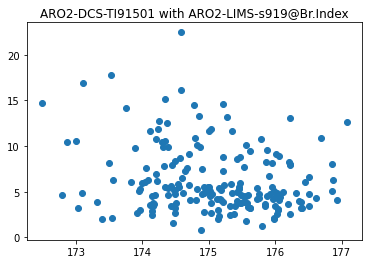

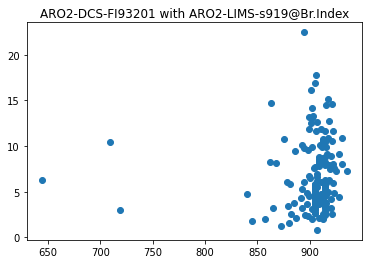

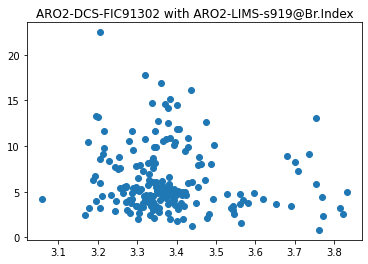

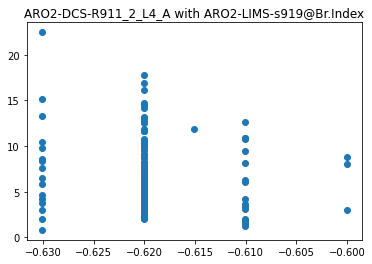

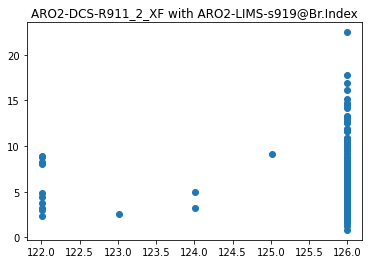

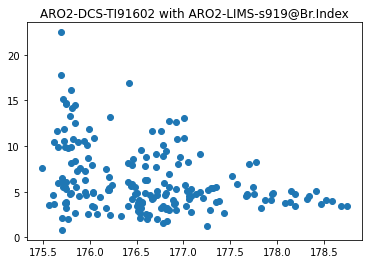

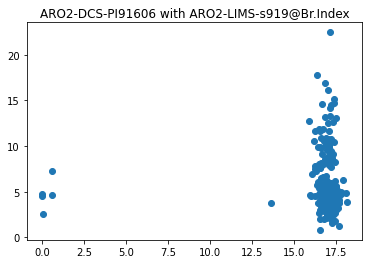

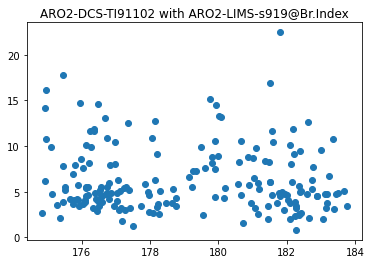

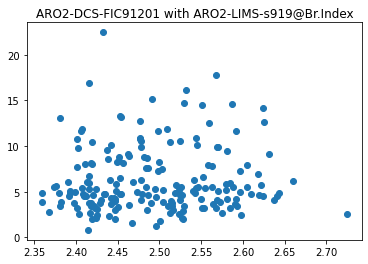

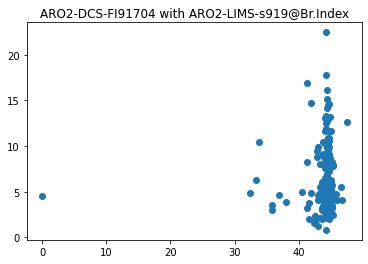

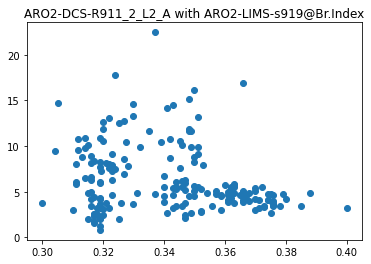

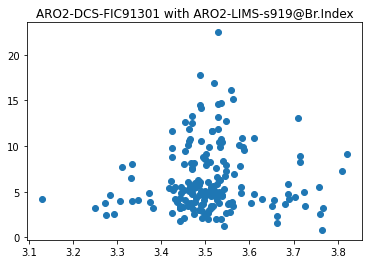

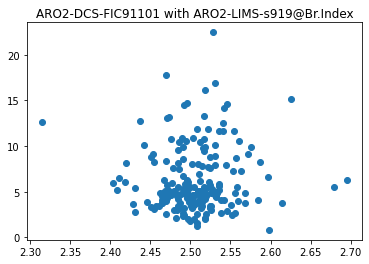

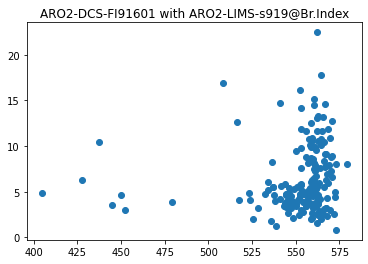

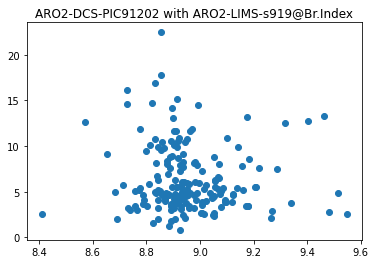

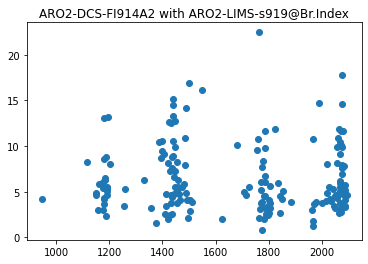

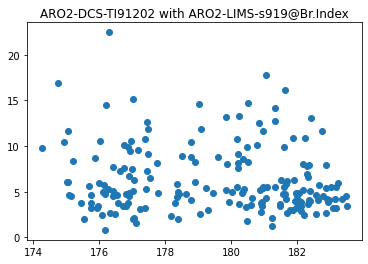

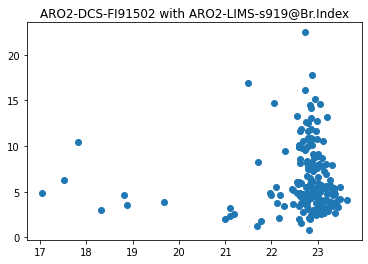

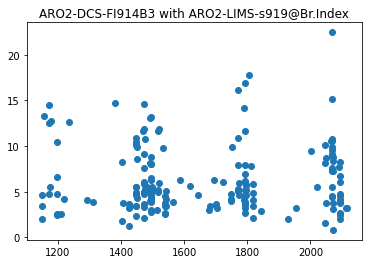

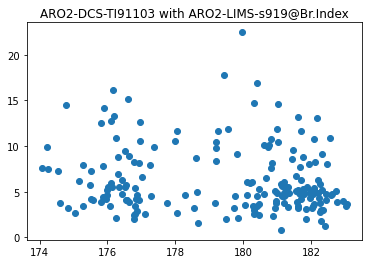

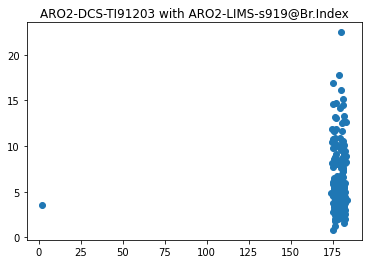

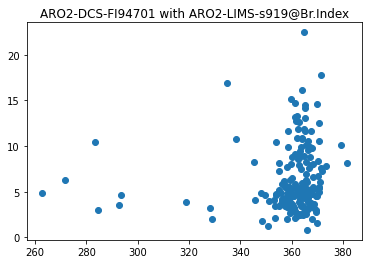

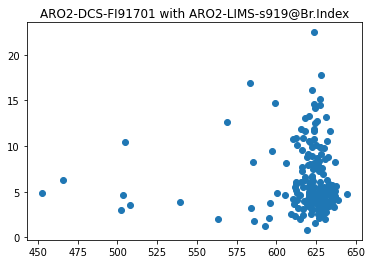

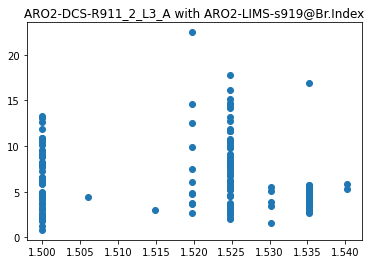

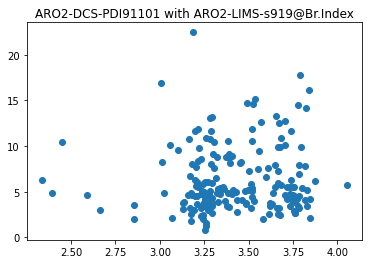

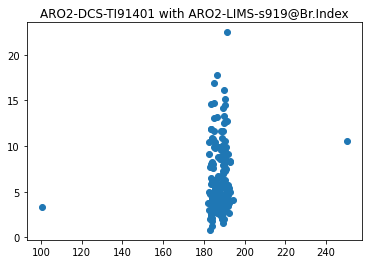

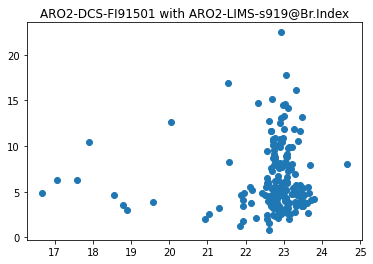

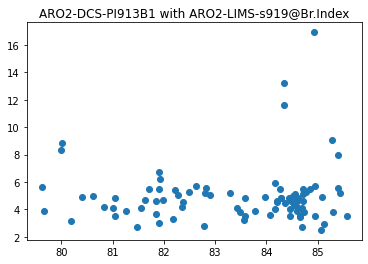

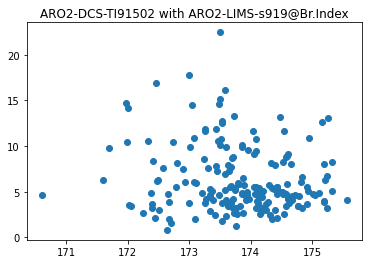

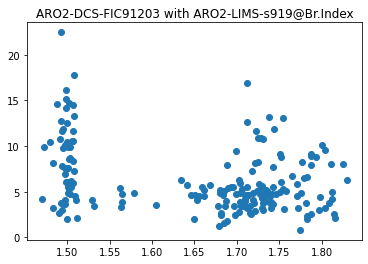

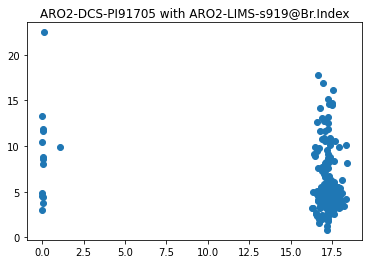

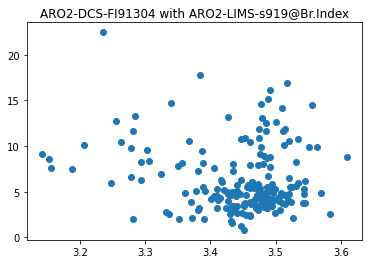

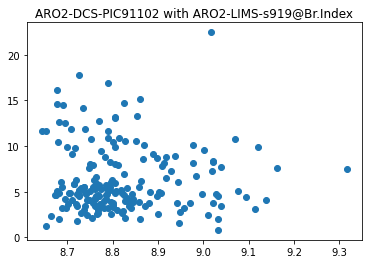

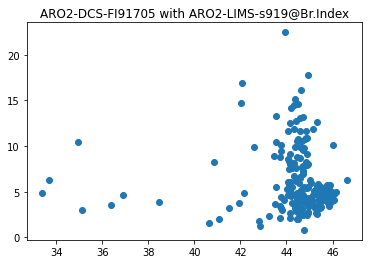

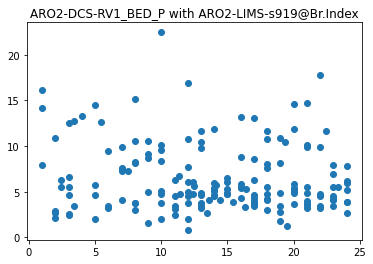

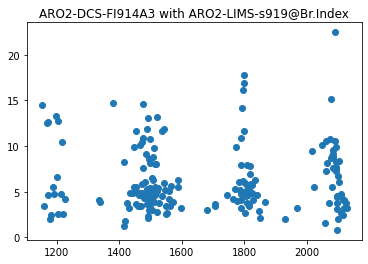

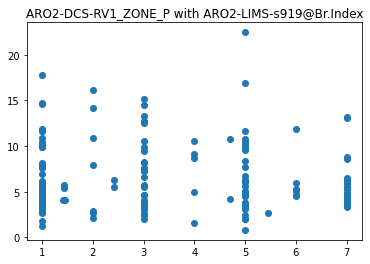

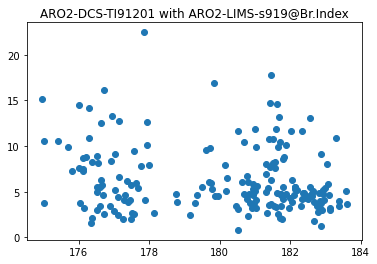

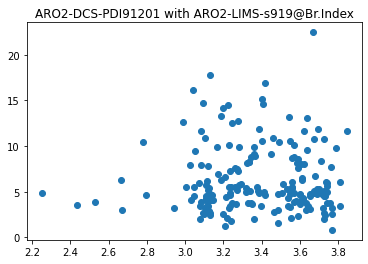

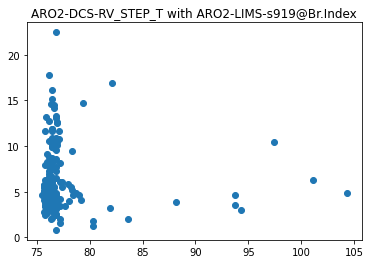

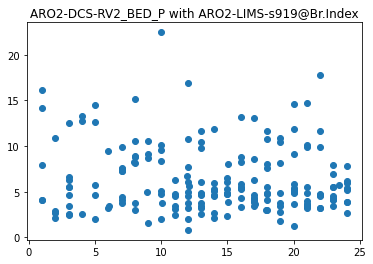

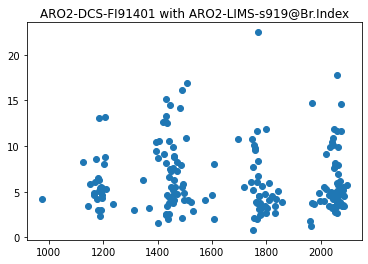

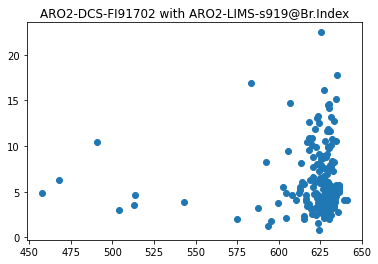

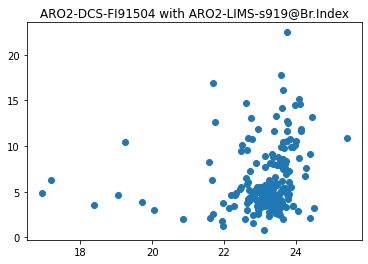

In [30]:
import matplotlib.pyplot as plt

def f(col_name):
    a = df[col_name]
    a = pd.to_numeric(a,errors='coerce')
    a = a.dropna()
    b = abs(a.index[1] - a.index[0])
    return a,b

features = list(set(dfx.columns[dfx.columns.str.contains('DCS')]))
target = 'ARO2-LIMS-s919@Br.Index'
for name in features[:]:
    x,_ = f(name)
    y,_ = f(target)
    xy = pd.DataFrame()
    xy['x'] = x
    xy['y'] = y
    xy = xy.dropna(axis=0)
    x = xy['x']
    y = xy['y']
    assert x.index.all() == y.index.all()
    plt.title(f'{name} with {target}')
    plt.scatter(x[:],y[:])
    plt.show()